In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [1]:
from prediction_helpers import *

In [2]:
ExE = pd.read_csv('../../extracted_data/ExE_imputed_5.csv', sep=',', index_col=0)
NxN = pd.read_csv('../../extracted_data/NxN_imputed_10.csv', sep=',', index_col=0)
ExN = pd.read_csv('../../extracted_data/ExN_filled_20.csv', sep=',', index_col=0)

In [3]:
pca_linear_regression = Pipeline([
    ('pca', PCA(n_components=0.9)), 
    ('linear_regression', LinearRegression())
])
pca_linear_regression.name = 'PCA + Linear Regression'

predictive_models_ExE = [ 
    pca_linear_regression,
    Lasso(alpha=0.0001),
    Ridge(alpha=5),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_NxN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005),
    Ridge(alpha=10),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_ExN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005),
    Ridge(alpha=5),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

random.seed(35)
proportion = 0.1

## ExE


Model: Pipeline
Average R²:   0.3986
Average RMSE: 0.0612

Model: Lasso
Average R²:   0.4385
Average RMSE: 0.0594

Model: Ridge
Average R²:   0.4519
Average RMSE: 0.0589

Model: RandomForestRegressor
Average R²:   0.2900
Average RMSE: 0.0676


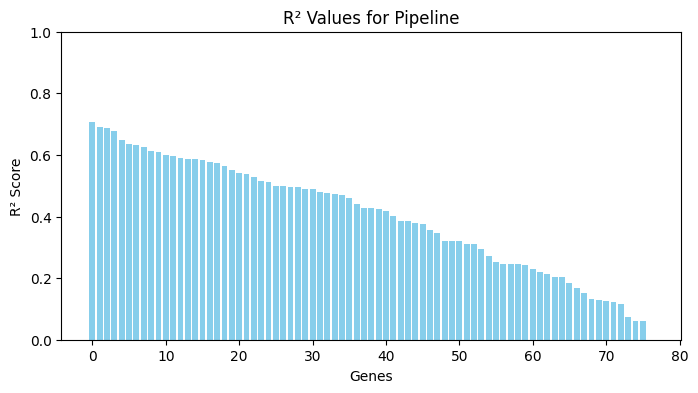

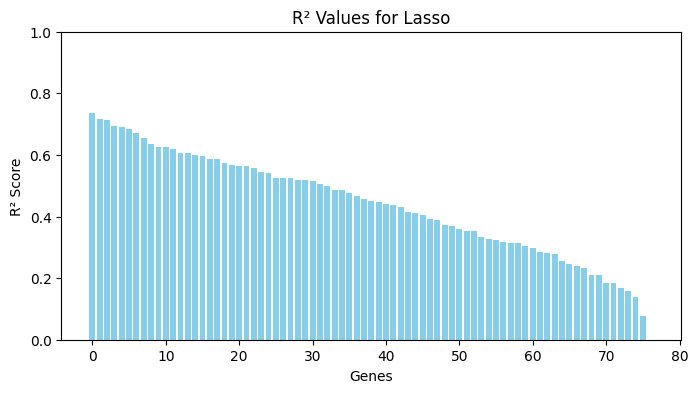

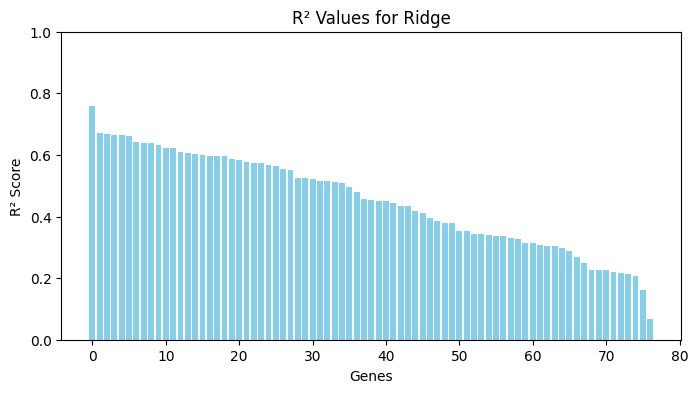

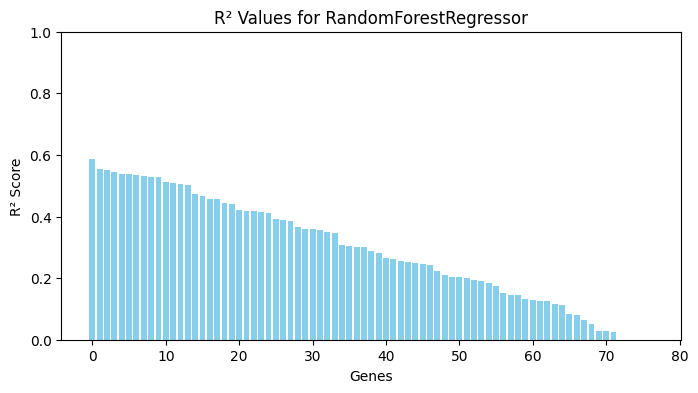

In [4]:
results_ExE = iterate_over_proportion_only_interactions(ExE, proportion, predictive_models_ExE)
print_results(results_ExE)
plot_results(results_ExE)

## NxN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Model: Pipeline
Average R²:   0.0932
Average RMSE: 0.0356

Model: Lasso
Average R²:   0.2155
Average RMSE: 0.0331

Model: Ridge
Average R²:   0.2166
Average RMSE: 0.0334

Model: RandomForestRegressor
Average R²:   0.0282
Average RMSE: 0.0375


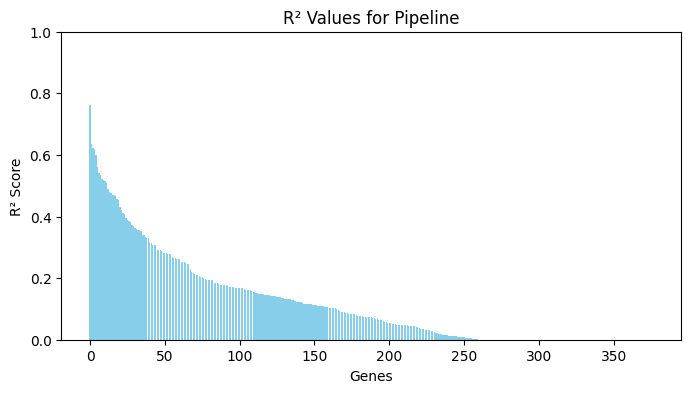

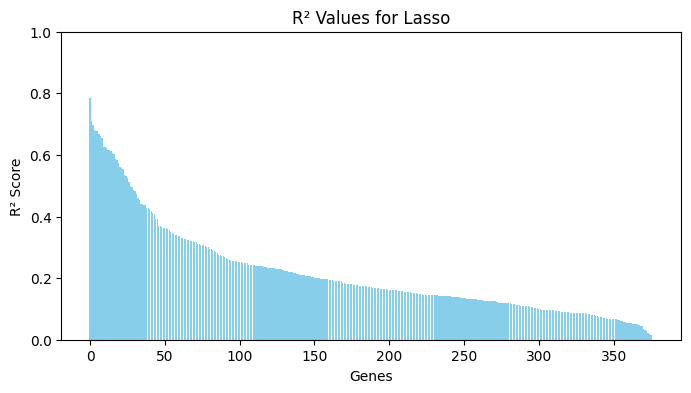

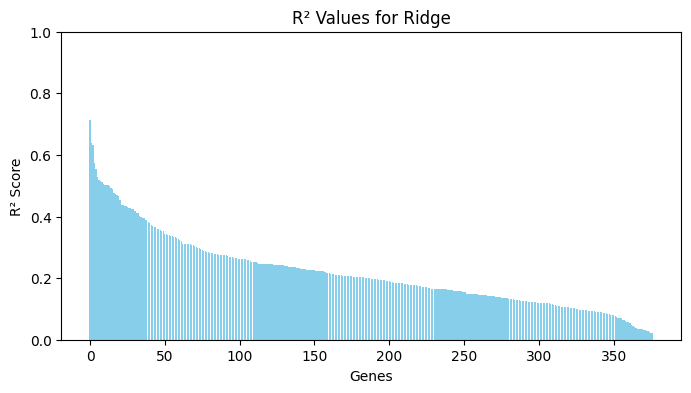

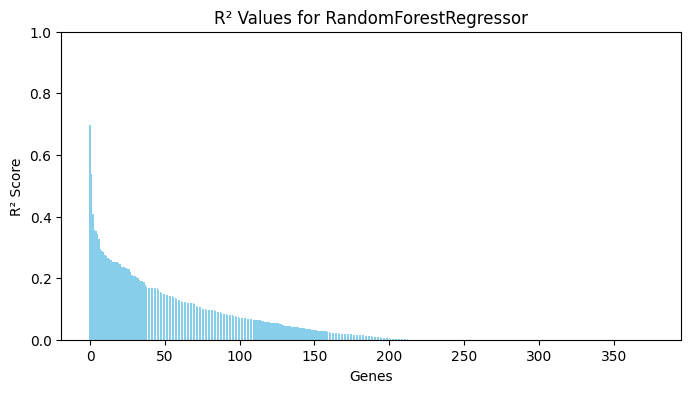

In [5]:
results_NxN = iterate_over_proportion_only_interactions(NxN, proportion, predictive_models_NxN)
print_results(results_NxN)
plot_results(results_NxN)

## ExN


Model: Pipeline
Average R²:   0.2426
Average RMSE: 0.0400

Model: Lasso
Average R²:   0.2905
Average RMSE: 0.0388

Model: Ridge
Average R²:   0.2925
Average RMSE: 0.0392

Model: RandomForestRegressor
Average R²:   0.1287
Average RMSE: 0.0430


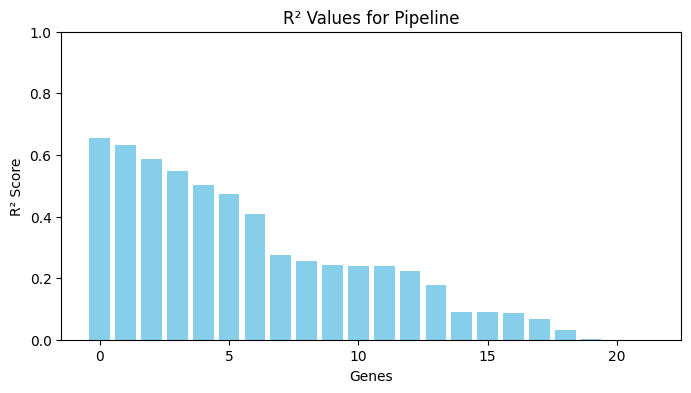

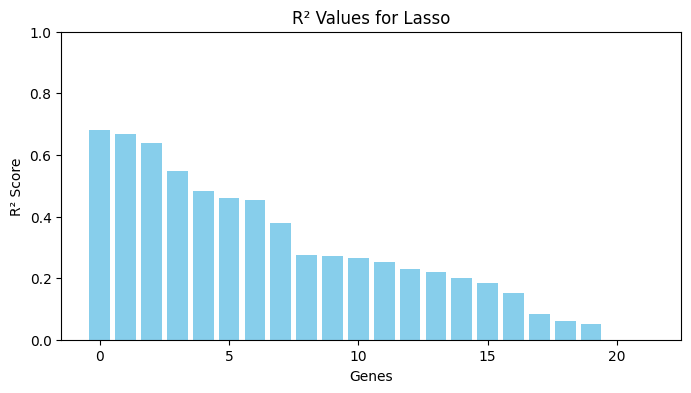

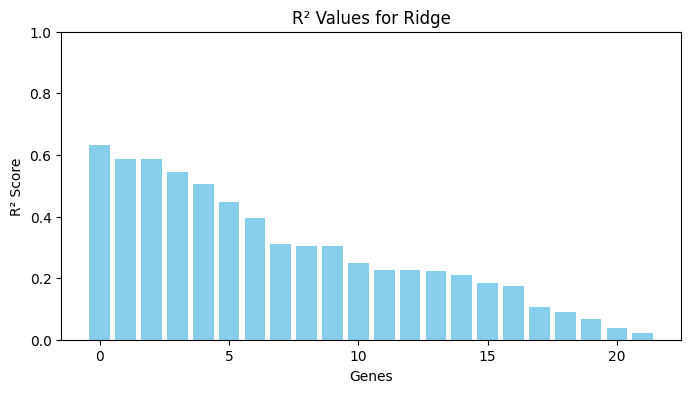

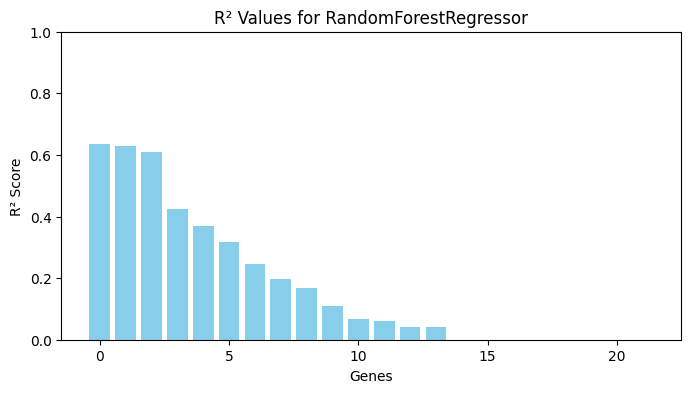

In [4]:
results_ExN = iterate_over_proportion_only_interactions(ExN, proportion, predictive_models_ExN)
print_results(results_ExN)
plot_results(results_ExN)


## Compilation Date

In [5]:
from datetime import datetime

now = datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))

2025-04-19 14:09:58
